W oryginalnym datasecie wystepowaly wartosci w NCBI_accession, ktore mialy wieej niz jedno ID w komorce. Odfiltrowalam je, bo generowalo to problemy.

W not_MS jakims udem nie wystepuja ;, sprawdzam co sie stanie po robieniu knn.

In [11]:
import pandas as pd

imsms = pd.read_csv('/home/PaulinaSk/mgr/bubabiba/not_MS_metadata.csv', sep=',')

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [ ]:
# import json
# import pandas as pd
# import requests
# from pathlib import Path

# def parse_json_to_csv(json_path: str, output_csv: str):
#     json_path = Path(json_path)
    
#     if not json_path.exists():
#         raise FileNotFoundError(f"Plik {json_path} nie istnieje.")
    
#     with open(json_path, 'r', encoding='utf-8') as file:
#         data = json.load(file)
    
#     df = pd.json_normalize(data)
    
#     df.to_csv(output_csv, index=False)
#     print(f"Dane zapisano do {output_csv}")

# def parse_tsv_to_csv(tsv_path: str, output_csv: str):

#     tsv_path = Path(tsv_path)
    
#     if not tsv_path.exists():
#         raise FileNotFoundError(f"Plik {tsv_path} nie istnieje.")
    
#     df = pd.read_csv(tsv_path, sep='\t')
    
#     df.to_csv(output_csv, index=False)
#     print(f"Dane zapisano do {output_csv}")

# def download_tsv_to_dataframe(url: str) -> pd.DataFrame:

#     response = requests.get(url)
#     response.raise_for_status()
    
#     from io import StringIO
#     df = pd.read_csv(StringIO(response.text), sep='\t')
#     print("Dane zostały pobrane i wczytane do DataFrame.")
#     return df


In [ ]:
# if __name__ == "__main__":
#     # parse_json_to_csv("data.json", "output.csv")
#     parse_tsv_to_csv("iMSMS_2022_metadata.tsv", "iMSMS_2022_metadata.csv")

In [12]:
# imsms = pd.read_csv("iMSMS_2022_metadata.csv")

imsms.head(5)

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,disease_subtype,age,age_category,...,ms_family,allergic,vitaminD_IU,children_number,roommates,recreational_drug,pets,education,occupation,collection_method
0,iMSMS_2022,s_11326.Q1.71602.0010.8.10.16,s_71602-0010,stool,no,control,healthy,healthy,66.0,senior,...,no,"dust, iodine",285.71,NaN,NaN,yes,no,post-graduate education,programmer,qtip(dry)
1,iMSMS_2022,s_11326.Q1.71602.0011.11.22.16,s_71602-0011,stool,no,control,healthy,healthy,69.0,senior,...,no,no,0.00,1.0,NaN,no,no,post-graduate education,retired,qtip(dry)
2,iMSMS_2022,s_11326.Q1.71602.0014.11.21.16,s_71602-0014,stool,no,control,healthy,healthy,69.0,senior,...,yes,no,0.00,3.0,NaN,no,no,post-graduate education,judge,qtip(dry)
3,iMSMS_2022,s_11326.Q1.71602.0015.1.12.17,s_71602-0015,stool,no,control,healthy,healthy,46.0,adult,...,yes,iodine (IV) tetracycline,485.71,NaN,NaN,yes,yes,high school graduate,sales,qtip(dry)
4,iMSMS_2022,s_11326.Q1.71602.0016.10.18.16,s_71602-0016,stool,no,control,healthy,healthy,39.0,adult,...,no,sulfur,600.00,1.0,NaN,no,yes,post-graduate education,assistant director for non-profit,qtip(dry)


In [13]:
imsms.shape

(1216, 43)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

/home/PaulinaSk/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [15]:
has_depression = imsms[imsms["disease"].str.contains("depression", case=False, na=False)]
no_depression = imsms[~imsms["disease"].str.contains("depression", case=False, na=False)]

print(f"Liczba osób z depresją: {len(has_depression)}")
print(f"Liczba osób bez depresji: {len(no_depression)}")

Liczba osób z depresją: 88
Liczba osób bez depresji: 1128


In [17]:
imsms[imsms['disease'].str.contains('depress', case=False, na=False)]['disease'].unique()

array(['anxiety;depression', 'postpartum_depression', 'depression',
       'eczema;depression;postpartum_depression',
       'asthma;anxiety;depression', 'asthma;eczema;depression',
       'depression;type2diabetes', 'anxiety;manic_depression_bipolar',
       'anxiety;manic_depression_bipolar;depression;type2diabetes',
       'asthma;depression', 'asthma;eating_disorder;depression',
       'depression;postpartum_depression', 'ocd;depression'], dtype=object)

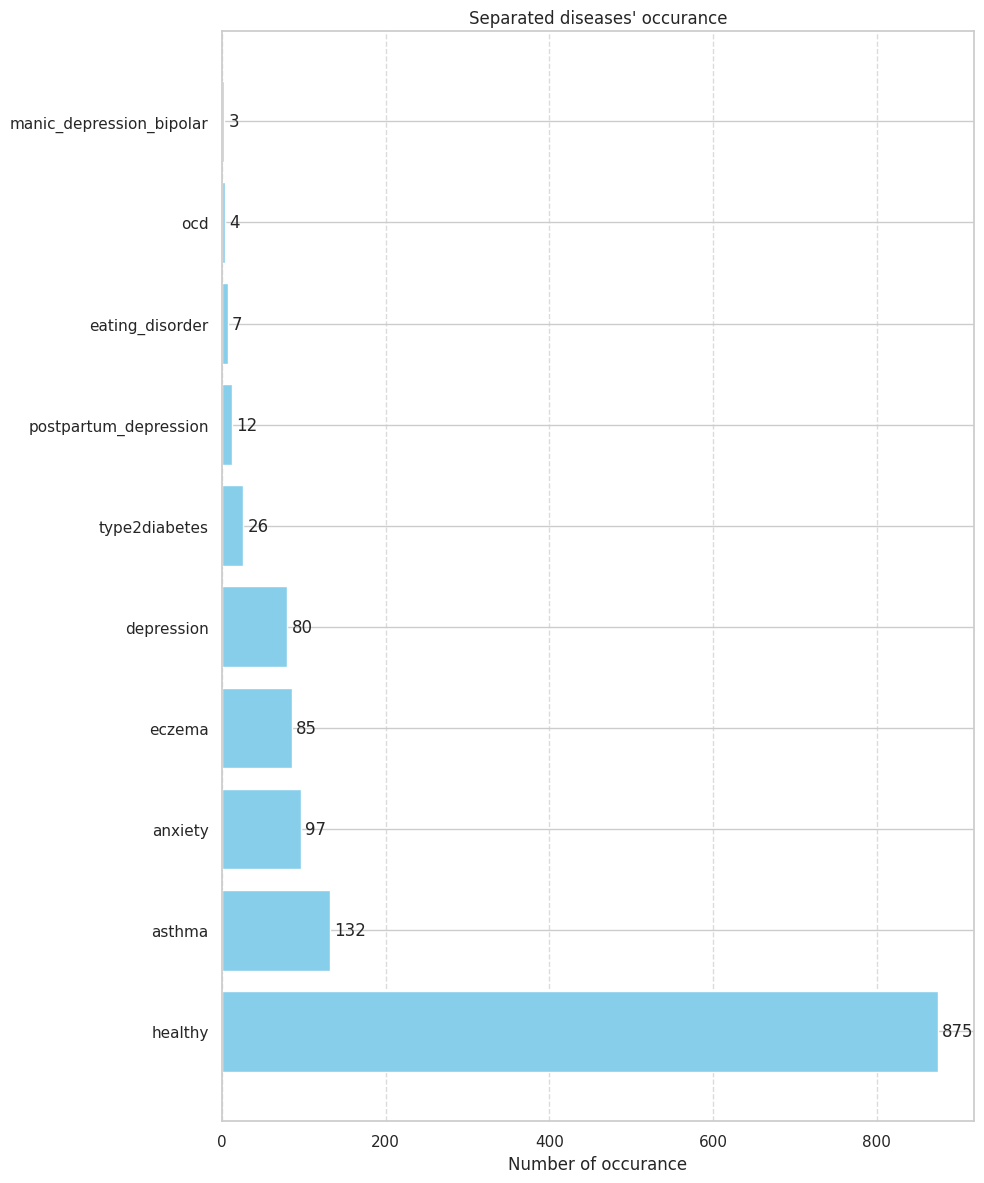

In [18]:
all_diseases = imsms["disease"].dropna().str.split(";").explode()

disease_counts = all_diseases.value_counts()

plt.figure(figsize=(10, 12))
bars = plt.barh(disease_counts.index, disease_counts.values[:20], color='skyblue')
plt.title("Separated diseases' occurance")
plt.xlabel("Number of occurance")
# plt.ylabel("Disease")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 5, bar.get_y() + bar.get_height()/2, int(xval), va='center')

plt.tight_layout()
plt.show()


Zamieniam sobie postpartum_depression na depression w celu zwiekszenia lb. probek.

In [19]:
imsms['disease'] = imsms['disease'].replace({'postpartum_depression': "depression"})

In [20]:
keywords = imsms["disease"].dropna().str.split(";").explode()

keyword_counts = keywords.value_counts()

print(keyword_counts)

disease
healthy                     875
asthma                      132
anxiety                      97
depression                   86
eczema                       85
type2diabetes                26
eating_disorder               7
postpartum_depression         6
ocd                           4
manic_depression_bipolar      3
Name: count, dtype: int64


In [21]:
from collections import Counter

co_diseases_with_depression = has_depression["disease"].str.split(";").explode()
co_disease_counts = Counter(co_diseases_with_depression)

if "depression" in co_disease_counts:
    co_disease_counts.pop("depression")

print("Top współwystępujące zaburzenia z depresją:")
for disease, count in co_disease_counts.most_common(10):
    print(f"{disease}: {count}")


Top współwystępujące zaburzenia z depresją:
anxiety: 22
asthma: 15
postpartum_depression: 12
eczema: 7
manic_depression_bipolar: 3
type2diabetes: 2
eating_disorder: 2
ocd: 2


In [22]:
co_diseases_without_depression = no_depression["disease"].str.split(";").explode()
co_disease_counts_no_dep = Counter(co_diseases_without_depression)

print("\nTop zaburzenia u osób bez depresji:")
for disease, count in co_disease_counts_no_dep.most_common(10):
    print(f"{disease}: {count}")



Top zaburzenia u osób bez depresji:
healthy: 875
asthma: 117
eczema: 78
anxiety: 75
type2diabetes: 24
eating_disorder: 5
ocd: 2


In [23]:
def count_diseases1(df, column='disease'):
    keywords = ["healthy", "MS", "depression"]
    results = {key: 0 for key in keywords}
    results["depression_only"] = 0
    results["depression_with_MS"] = 0
    results["depression_with_others"] = 0

    for diseases in df[column]:
        if not isinstance(diseases, str):
            continue

        disease_list = diseases.lower().split(';')

        for key in keywords:
            if key.lower() in disease_list:
                results[key] += 1

        if "depression" in disease_list:
            if len(disease_list) == 1:  # tylko "depression"
                results["depression_only"] += 1
            elif "ms" in disease_list:  # "depression" z "MS"
                results["depression_with_MS"] += 1
            else:  # "depression" z innymi chorobami (bez "MS")
                results["depression_with_others"] += 1

    return results

result = count_diseases1(imsms, column='disease')
print(result)


{'healthy': 875, 'MS': 0, 'depression': 86, 'depression_only': 46, 'depression_with_MS': 0, 'depression_with_others': 40}


In [24]:
# wiersze, które nie zawierają 'MS' w kolumnie 'disease'
imsms_filtered = imsms[~imsms['disease'].str.contains('MS', case=False, na=False)]

# print(imsms_filtered)
# imsms_filtered.to_csv('not_MS_metadata.csv', index=False)


In [25]:
keywords = imsms_filtered["disease"].dropna().str.split(";").explode()

keyword_counts = keywords.value_counts()

print(keyword_counts)

disease
healthy                     875
asthma                      132
anxiety                      97
depression                   86
eczema                       85
type2diabetes                26
eating_disorder               7
postpartum_depression         6
ocd                           4
manic_depression_bipolar      3
Name: count, dtype: int64


In [ ]:
# Sprawdź wszystkie unikalne wartości zawierające "depress" (ignorując wielkość liter)
imsms_filtered[imsms_filtered['disease'].str.contains('depress', case=False, na=False)]['disease'].unique()

array(['anxiety;depression', 'depression',
       'eczema;depression;postpartum_depression',
       'asthma;anxiety;depression', 'asthma;eczema;depression',
       'depression;type2diabetes', 'anxiety;manic_depression_bipolar',
       'anxiety;manic_depression_bipolar;depression;type2diabetes',
       'asthma;depression', 'asthma;eating_disorder;depression',
       'depression;postpartum_depression', 'ocd;depression'], dtype=object)

In [26]:
imsms_filtered.head(3)

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,disease_subtype,age,age_category,...,ms_family,allergic,vitaminD_IU,children_number,roommates,recreational_drug,pets,education,occupation,collection_method
0,iMSMS_2022,s_11326.Q1.71602.0010.8.10.16,s_71602-0010,stool,no,control,healthy,healthy,66.0,senior,...,no,"dust, iodine",285.71,NaN,NaN,yes,no,post-graduate education,programmer,qtip(dry)
1,iMSMS_2022,s_11326.Q1.71602.0011.11.22.16,s_71602-0011,stool,no,control,healthy,healthy,69.0,senior,...,no,no,0.00,1.0,NaN,no,no,post-graduate education,retired,qtip(dry)
2,iMSMS_2022,s_11326.Q1.71602.0014.11.21.16,s_71602-0014,stool,no,control,healthy,healthy,69.0,senior,...,yes,no,0.00,3.0,NaN,no,no,post-graduate education,judge,qtip(dry)


In [27]:
imsms_filtered[imsms_filtered["disease"]=="depression"].shape

(46, 43)

In [28]:
check = imsms_filtered[["disease", "age", "gender", "BMI", "NCBI_accession"]]

check.tail(10)


,disease,age,gender,BMI,NCBI_accession
1206,healthy,76.0,male,25.473465,ERR6997214
1207,healthy,63.0,male,28.785772,ERR6997215
1208,healthy,63.0,male,20.917870,ERR6997218
1209,healthy,31.0,female,19.486961,ERR6997220
1210,healthy,38.0,male,23.724537,ERR6997223
1211,healthy,38.0,male,23.724537,ERR6997224
1212,healthy,32.0,female,18.426534,ERR6997308
1213,healthy,45.0,female,21.585799,ERR6997476
1214,healthy,47.0,female,24.036549,ERR6997484
1215,asthma,37.0,male,27.166919,ERR6998235


Szukam par depressed i healthy takich, aby na podstawie plci, BMI i wieku byly jak najbardziej podobne.

In [29]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


# # Przekształcenie disease na trzy klasy 
def simplify_disease(value):
    value = str(value).lower()
    if "depression" in value:
        return "depression"
    elif "healthy" in value:
        return "healthy"
    else:
        return "other"

# def simplify_disease(value):
#     value = str(value).lower()  # zamiana na małe litery
#     parts = [p.strip() for p in value.split(";")]  # rozbijamy po średniku
#     if any("depression" in p for p in parts):  # jeśli w którymś fragmencie jest "depression"
#         return "depression"
#     elif any("healthy" in p for p in parts):  # jeśli w którymś fragmencie jest "healthy"
#         return "healthy"
#     else:
#         return "other"


imsms_filtered["disease"] = imsms_filtered["disease"].apply(simplify_disease)

In [30]:
check = imsms_filtered[["disease", "age", "gender", "BMI", "NCBI_accession"]]

check.tail(20)

,disease,age,gender,BMI,NCBI_accession
1196,other,51.0,male,26.365603,ERR6997146
1197,healthy,53.0,male,33.507623,ERR6997201
1198,healthy,53.0,male,33.507623,ERR6997202
1199,healthy,50.0,male,27.383285,ERR6997203
1200,healthy,50.0,male,27.383285,ERR6997204
1201,healthy,47.0,male,29.939736,ERR6997205
1202,healthy,47.0,male,29.939736,ERR6997206
1203,healthy,34.0,female,20.485970,ERR6997208
1204,healthy,52.0,male,25.198822,ERR6997210
1205,healthy,59.0,male,29.418426,ERR6997212


In [ ]:
# imsms_filtered = imsms_filtered.set_index("NCBI_accession")

In [ ]:
# imsms_filtered.index.is_unique

In [31]:
imsms_filtered[imsms_filtered["disease"]=="depression"].shape

(88, 43)

In [32]:
# Sprawdź wszystkie unikalne wartości zawierające "depress" (ignorując wielkość liter)
imsms_filtered[imsms_filtered['disease'].str.contains('depress', case=False, na=False)]['disease'].unique()

array(['depression'], dtype=object)

In [33]:
# from sklearn.neighbors import NearestNeighbors

# metadata = imsms_filtered.reset_index(drop=True)

# depr = metadata[metadata["disease"] == "depression"].reset_index(drop=True)
# healthy = metadata[metadata["disease"] == "healthy"].reset_index(drop=True)

# features = ["age", "gender", "BMI"]

# X_depr = depr[features].copy()
# X_healthy = healthy[features].copy()

# # gender -> kody liczbowe (male=0, female=1 np.)
# X_depr["gender"] = X_depr["gender"].astype("category").cat.codes
# X_healthy["gender"] = X_healthy["gender"].astype("category").cat.codes

# # KNN
# nn = NearestNeighbors(n_neighbors=1, metric="euclidean")
# nn.fit(X_healthy)

# distances, indices = nn.kneighbors(X_depr)

# # przeplatane DEP i HEALTHY
# rows = []
# for i, h_idx in enumerate(indices.flatten()):
#     rows.append(depr.iloc[[i]])          # depresja
#     rows.append(healthy.iloc[[h_idx]])   # zdrowy

# matched_pairs = pd.concat(rows, axis=0).reset_index(drop=True)

# # matched_pairs.to_csv("matched_pairs.csv", index=False)


In [34]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

metadata = imsms_filtered.reset_index(drop=True)

depr = metadata[metadata["disease"] == "depression"].reset_index(drop=True)
healthy = metadata[metadata["disease"] == "healthy"].reset_index(drop=True)

features = ["age", "gender", "BMI"]

# gender - changed to numeric codes
depr_enc = depr.copy()
healthy_enc = healthy.copy()
depr_enc["gender"] = depr_enc["gender"].astype("category").cat.codes
healthy_enc["gender"] = healthy_enc["gender"].astype("category").cat.codes

rows = []
available_healthy = healthy_enc.copy()   # we are going to skip used healthy patients

for i, dep_row in depr_enc.iterrows():
    if available_healthy.empty:
        print("No healthy to match!")
        break
    
    nn = NearestNeighbors(n_neighbors=1, metric="euclidean")
    nn.fit(available_healthy[features])
    
    dist, idx = nn.kneighbors([dep_row[features].values])
    
    h_idx = available_healthy.iloc[idx[0][0]].name  
    
    # saving original rows without modification to its columns
    rows.append(depr.iloc[[i]])
    rows.append(healthy.loc[[h_idx]])
    
    # deleteing chosen healthy patient
    available_healthy = available_healthy.drop(h_idx)

matched_pairs = pd.concat(rows, axis=0).reset_index(drop=True)

# matched_pairs.to_csv("matched_pairs.csv", index=False)


/home/PaulinaSk/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/PaulinaSk/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/PaulinaSk/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/PaulinaSk/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/PaulinaSk/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature nam

In [35]:
depr.shape

(88, 43)

In [36]:
check = depr[["disease", "age", "gender", "BMI", "NCBI_accession"]]

check["NCBI_accession"].is_unique
# imsms_filtered.index.is_unique

True

In [37]:
check = depr[["disease", "age", "gender", "BMI", "NCBI_accession"]]

check["NCBI_accession"].is_unique
# imsms_filtered.index.is_unique

True

In [38]:
final_pairs1 = matched_pairs[["disease", "age", "gender", "BMI", "NCBI_accession"]]
final_pairs1.tail(20)

,disease,age,gender,BMI,NCBI_accession
156,depression,47.0,male,29.061224,ERR6997005
157,healthy,47.0,male,29.939736,ERR6997205
158,depression,47.0,male,29.061224,ERR6997006
159,healthy,47.0,male,29.939736,ERR6997206
160,depression,61.0,female,21.829952,ERR6997099
161,healthy,60.0,female,21.367521,ERR6995104
162,depression,66.0,male,23.939481,ERR6997100
163,healthy,65.0,male,24.464564,ERR6995616
164,depression,57.0,male,27.732300,ERR6997113
165,healthy,57.0,male,27.347251,ERR6995807


In [ ]:
# matched_pairs.to_csv("pojedyncze_cleaned_paired_imsms.csv", index=False)
# combined.to_csv("paired_imsms.csv", index=False)

## Age distribution

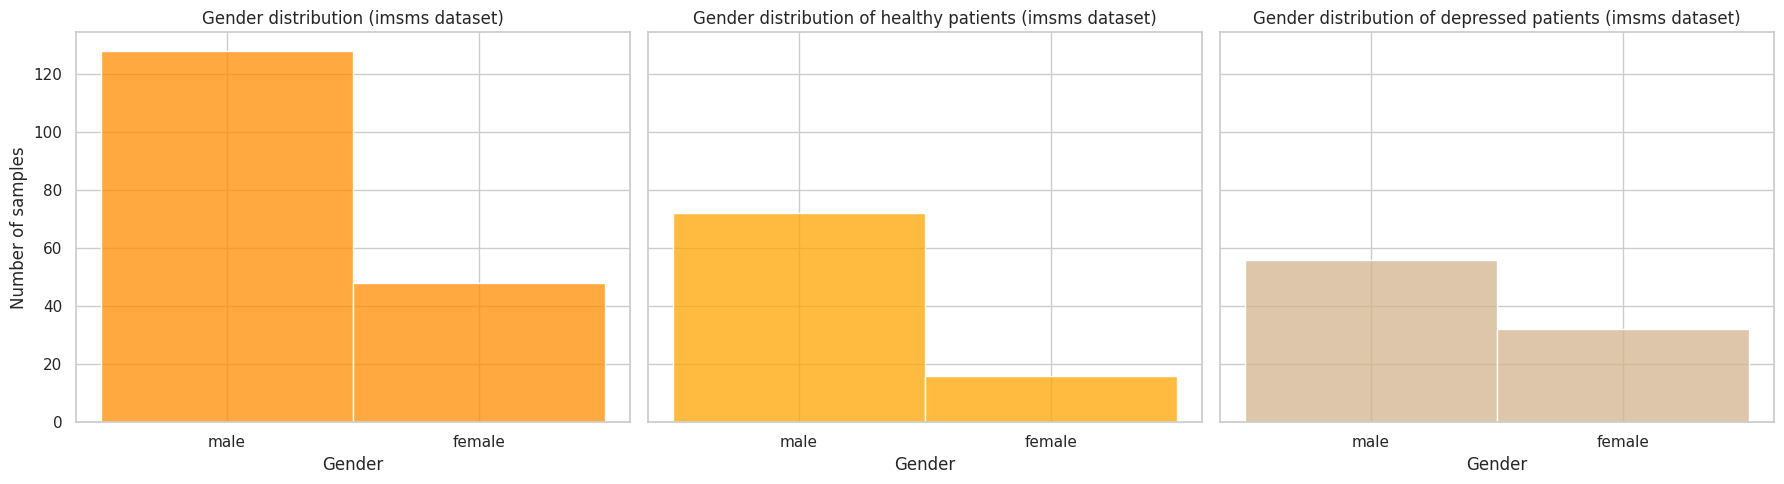

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(
    data=matched_pairs,
    x="gender",
    bins=2,
    color="darkorange",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Gender distribution (imsms dataset)")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of samples")

#  Healthy
sns.histplot(
    data=matched_pairs[matched_pairs["disease"] == "healthy"],
    x="gender",
    bins=2,
    color="orange",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Gender distribution of healthy patients (imsms dataset)")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=matched_pairs[matched_pairs["disease"] == "depression"],
    x="gender",
    bins=2,
    color="tan",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Gender distribution of depressed patients (imsms dataset)")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()

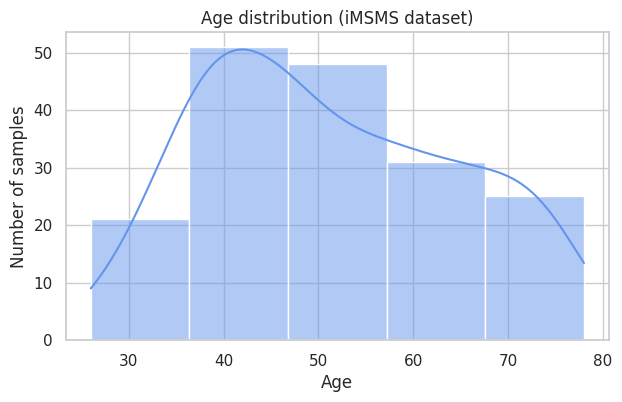

In [40]:
plt.figure(figsize=(7, 4))
sns.histplot(matched_pairs["age"], bins=5, kde=True, color="cornflowerblue")
plt.title("Age distribution (iMSMS dataset)")
plt.xlabel("Age")
plt.ylabel("Number of samples")
plt.show()

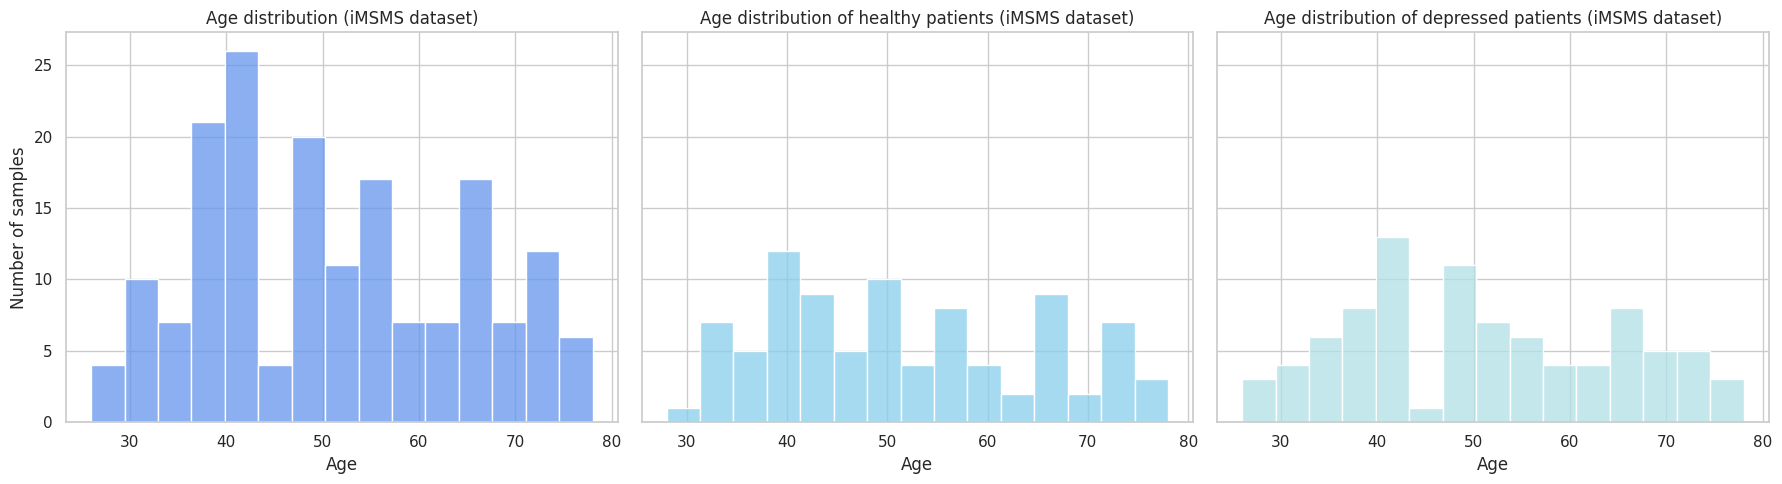

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(
    data=matched_pairs,
    x="age",
    bins=15,
    color="cornflowerblue",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Age distribution (iMSMS dataset)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of samples")

#  Healthy
sns.histplot(
    data=matched_pairs[matched_pairs["disease"] == "healthy"],
    x="age",
    bins=15,
    color="skyblue",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Age distribution of healthy patients (iMSMS dataset)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=matched_pairs[matched_pairs["disease"] == "depression"],
    x="age",
    bins=15,
    color="powderblue",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Age distribution of depressed patients (iMSMS dataset)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()


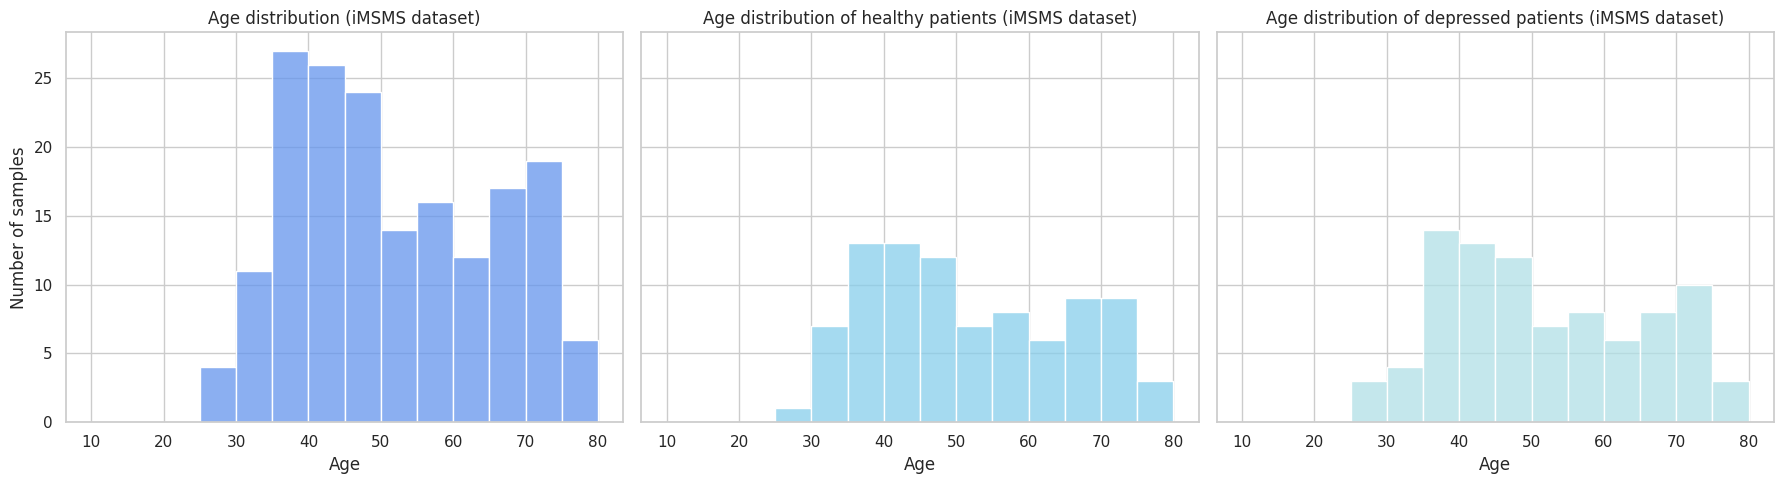

In [43]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

bins = np.arange(10, 81, 5)

sns.histplot(
    data=matched_pairs,
    x="age",
    bins=bins,
    color="cornflowerblue",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Age distribution (iMSMS dataset)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of samples")

#  Healthy
sns.histplot(
    data=matched_pairs[matched_pairs["disease"] == "healthy"],
    x="age",
    bins=bins,
    color="skyblue",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Age distribution of healthy patients (iMSMS dataset)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=matched_pairs[matched_pairs["disease"] == "depression"],
    x="age",
    bins=bins,
    color="powderblue",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Age distribution of depressed patients (iMSMS dataset)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()


In [44]:
# Grupowanie po disease i gender
counts = matched_pairs.groupby(["disease", "gender"]).size().reset_index(name="count")

print(counts)


      disease  gender  count
0  depression  female     32
1  depression    male     56
2     healthy  female     16
3     healthy    male     72


## BMI distribution

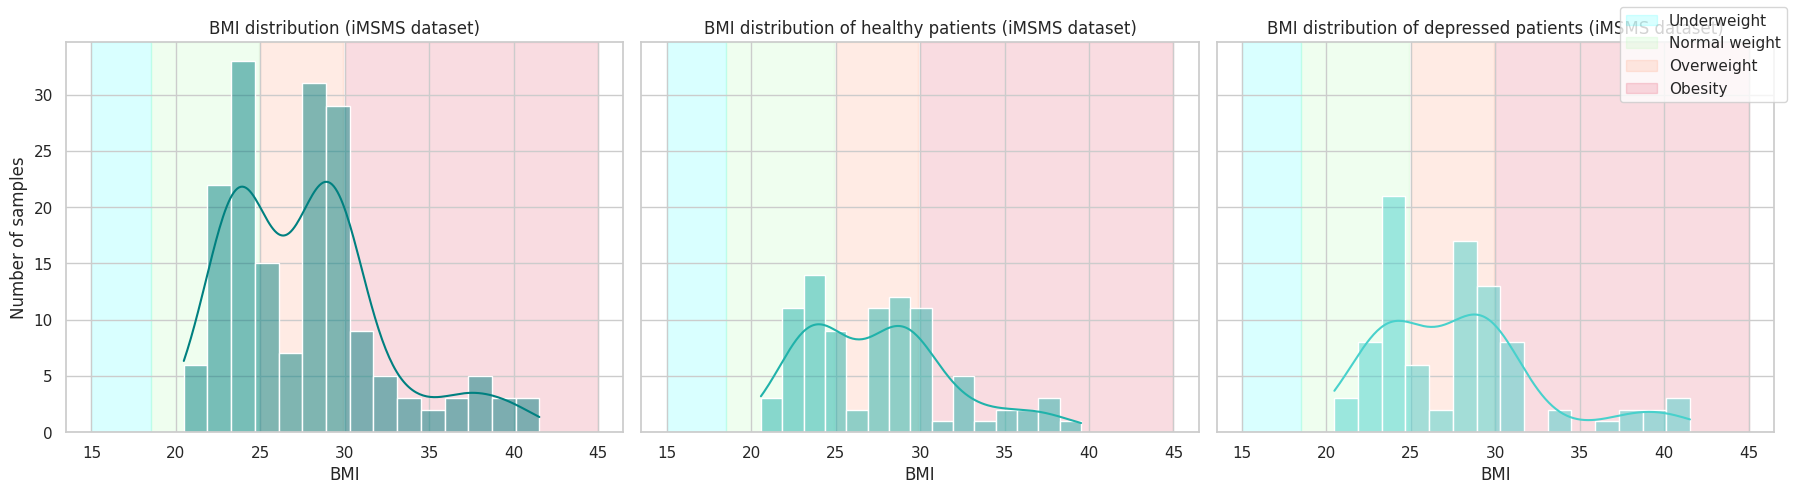

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

datasets = [
    ("BMI distribution (iMSMS dataset)", matched_pairs),
    ("BMI distribution of healthy patients (iMSMS dataset)", matched_pairs[matched_pairs["disease"] == "healthy"]),
    ("BMI distribution of depressed patients (iMSMS dataset)", matched_pairs[matched_pairs["disease"] == "depression"])
]

colors = ["teal", "lightseagreen", "mediumturquoise"]

for ax, (title, data), color in zip(axes, datasets, colors):
    # --- shaded BMI ranges pod histogramem
    ax.axvspan(15, 18.5, color="cyan", alpha=0.15, label="Underweight", zorder=0)
    ax.axvspan(18.5, 24.9, color="palegreen", alpha=0.15, label="Normal weight", zorder=0)
    ax.axvspan(25, 29.9, color="coral", alpha=0.15, label="Overweight", zorder=0)
    ax.axvspan(30, 45, color="crimson", alpha=0.15, label="Obesity", zorder=0)

    sns.histplot(data["BMI"], bins=15, kde=True, color=color, ax=ax, zorder=1)

    ax.set_title(title)
    ax.set_xlabel("BMI")
    ax.set_ylabel("Number of samples")

# wspólna legenda dla shaded ranges
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

plt.tight_layout()
plt.show()


## Study condition distribution

/tmp/ipykernel_3664995/1645743599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=matched_pairs["disease"], palette="Set2", order=matched_pairs["disease"].value_counts().index)


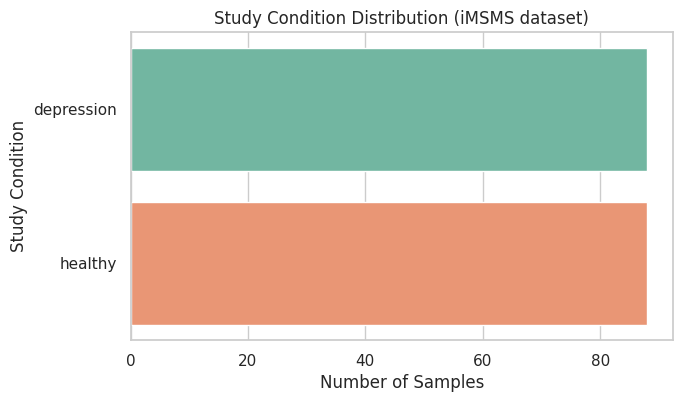

In [51]:
plt.figure(figsize=(7, 4))
sns.countplot(y=matched_pairs["disease"], palette="Set2", order=matched_pairs["disease"].value_counts().index)
plt.title("Study Condition Distribution (iMSMS dataset)")
plt.xlabel("Number of Samples")
plt.ylabel("Study Condition")
plt.show()

## Age Comparison Across Study Conditions

/tmp/ipykernel_3664995/3553239608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=matched_pairs, palette="Set2")


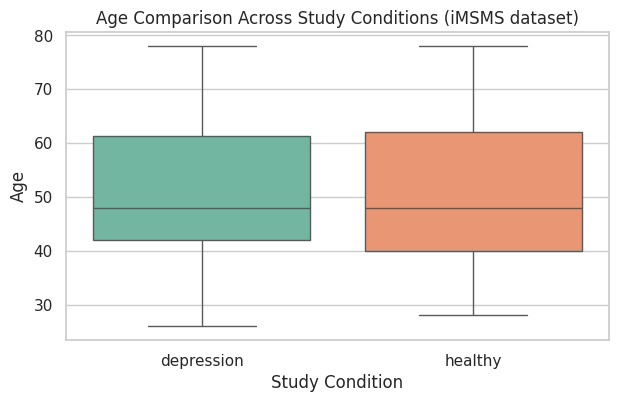

In [49]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="age", data=matched_pairs, palette="Set2")
plt.title("Age Comparison Across Study Conditions (iMSMS dataset)")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

## Correlation Analysis

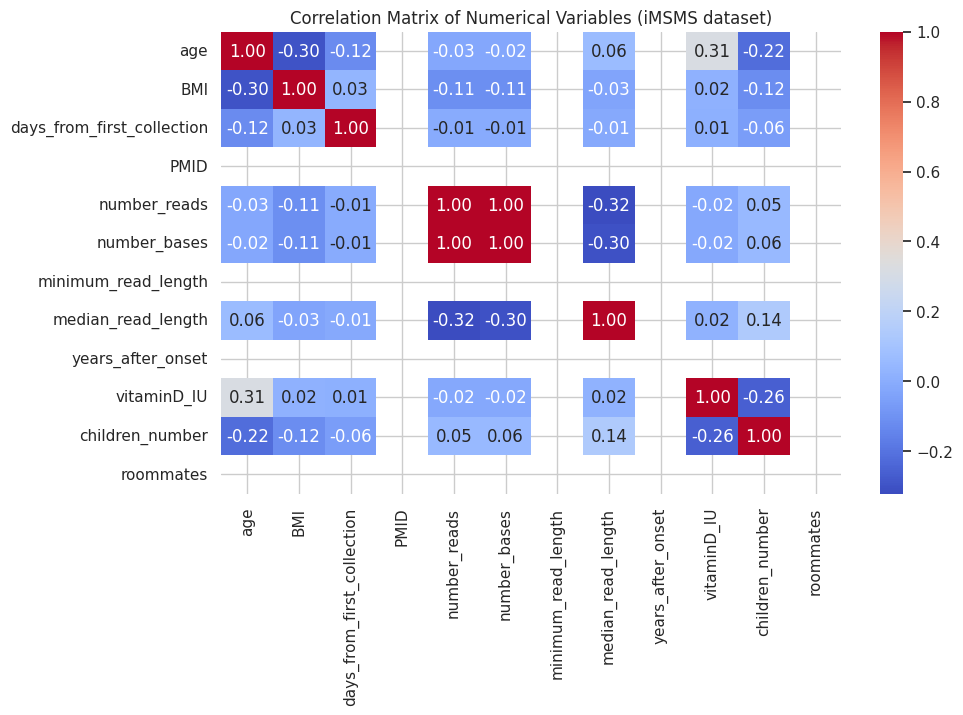

/tmp/ipykernel_3664995/1888172965.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="BMI", data=matched_pairs, palette="Set2")


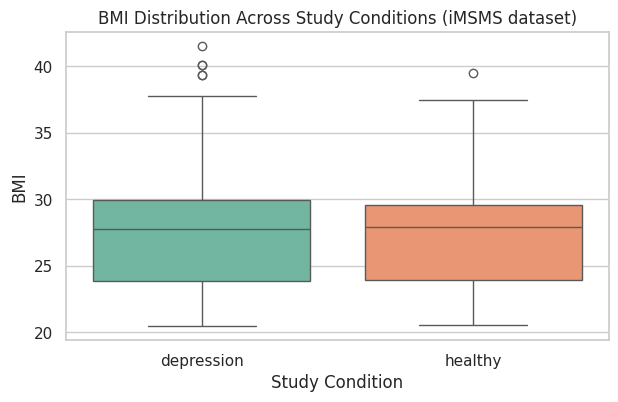

/tmp/ipykernel_3664995/1888172965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=matched_pairs, palette="Set2")


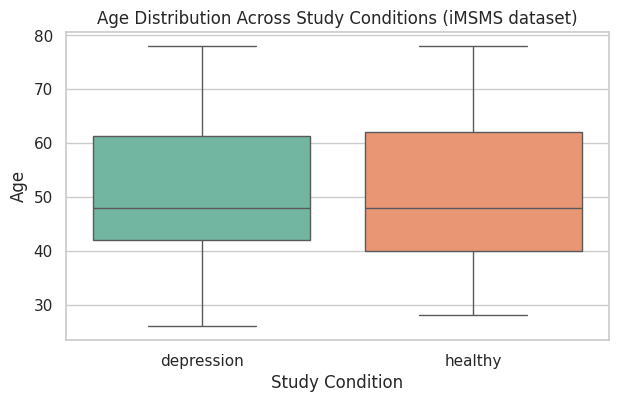

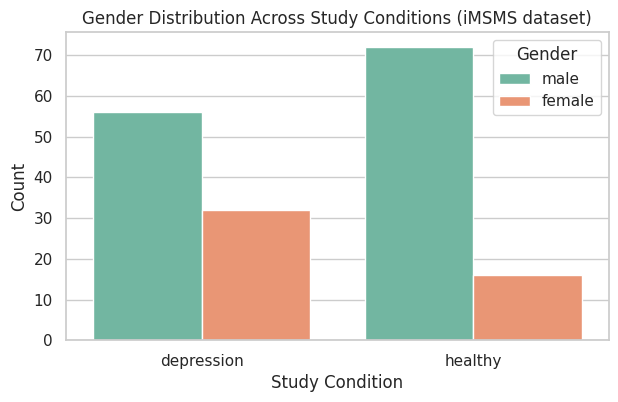

In [50]:
correlation_matrix = matched_pairs.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables (iMSMS dataset)")

plt.show()

# Health condition correlation analysis
plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="BMI", data=matched_pairs, palette="Set2")
plt.title("BMI Distribution Across Study Conditions (iMSMS dataset)")
plt.xlabel("Study Condition")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="age", data=matched_pairs, palette="Set2")
plt.title("Age Distribution Across Study Conditions (iMSMS dataset)")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

if "gender" in matched_pairs.columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x="disease", hue="gender", data=matched_pairs, palette="Set2")
    plt.title("Gender Distribution Across Study Conditions (iMSMS dataset)")
    plt.xlabel("Study Condition")
    plt.ylabel("Count")
    plt.legend(title="Gender")
    plt.show()
    
# if "disease" in imsms.columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=combined_pairs["disease"], palette="pastel", order=combined_pairs["disease"].value_counts().index)
#     plt.title("Disease Distribution")
#     plt.xlabel("Number of Samples")
#     plt.ylabel("Disease")
#     plt.show()